In [1]:
%pip install qiskit
%pip install numpy
%pip install matplotlib
%pip install scipy
%pip install quantum_simulation_recipe

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [33]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, random_clifford, Pauli, Operator, partial_trace, entropy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
from quantum_simulation_recipe.trotter import *
from quantum_simulation_recipe.bounds import norm, tight_bound, commutator
from quantum_simulation_recipe.plot_config import *
from time import sleep
from tqdm import tqdm

def StateError(state,ErrorU):
    st=ErrorU @ state
    error=np.real(st.conj().T @ st)
    return np.sqrt(error)

States_of_different_magics=np.load("./data/differentstates.npy")
Magics=np.load("./data/differentmagics_right.npy")

In [34]:
# Model: 1D Heisenberg model
n=10
J,h=1,0.2
t=10
r=100
delta_t=t/r
order=2
hnn=Nearest_Neighbour_1d(n=n,Jx=J,Jy=J,Jz=J,hx=h,hy=0,hz=0,pbc=True)
h_list=hnn.ham_xyz
approx_U=pf(h_list,t=t,r=r,order=1)
exact_U=expH(hnn.ham,t=t)
Error_U=exact_U-approx_U

#Distribution of errors for different entanglement
def random_local(state):
    n=state.num_qubits
    for i in range(n):
        state=state.evolve(random_clifford(1),[i])
    return state
States_of_typical_entanglement=np.load("./vardata/entstates.npy")
States_of_atypical_entanglement=np.load("./vardata/antientstates.npy")
Tyentropies=np.load("vardata/part4typical.npy")
Atyentropies=np.load("vardata/part4atypical.npy")


In [35]:
moments_anti=[]
moments_ent=[]

if(True):
    SampleScale=1000
    Typical_errors_update=[]
    Atypical_errors_update=[]
    pbar=tqdm(total=len(States_of_typical_entanglement))
    for i,st in enumerate(States_of_typical_entanglement):
        step=0
        state=Statevector(st)
        sample=[]
        while step < SampleScale:
            state=random_local(state)
            error=StateError(state.data,Error_U)
            sample.append(error)
            step+=1  
        Typical_errors_update.append(sample)
        moments_ent.append(np.var(sample))
        pbar.update(1)
    pbar.close()
    #print(Typical_errors_update)
    print(moments_ent)
    pbar=tqdm(total=len(States_of_atypical_entanglement))
    for i,st in enumerate(States_of_atypical_entanglement):
        step=0
        state=Statevector(st)
        sample=[]
        while step < SampleScale:
            state=random_local(state)
            error=StateError(state.data,Error_U)
            sample.append(error)
            step+=1  
        Atypical_errors_update.append(sample)
        moments_anti.append(np.var(sample))
        pbar.update(1)
    pbar.close()
    #print(Atypical_errors_update)
    print(moments_anti)

100%|██████████| 41/41 [02:44<00:00,  4.01s/it]


[np.float64(0.002369735845240988), np.float64(0.0007406141342717541), np.float64(0.0001741077611571482), np.float64(0.00018679860644591539), np.float64(0.0001863407586365595), np.float64(0.00017860495599321063), np.float64(0.00018172444860463133), np.float64(0.00019615457364486222), np.float64(0.00017055014068282986), np.float64(0.00017755118337682525), np.float64(0.0002442006811015415), np.float64(0.00021821108393834198), np.float64(0.00016824369915858288), np.float64(0.00020222066561312804), np.float64(0.00017758951874724335), np.float64(0.00018308754675174454), np.float64(0.00017866945769989795), np.float64(0.0002172662954964253), np.float64(0.00017514460899821236), np.float64(0.00015223490175088222), np.float64(0.0001861867184800344), np.float64(0.0001739916974933535), np.float64(0.00016727178376691452), np.float64(0.00019146617018178387), np.float64(0.00015794912467080214), np.float64(0.00016920551539716778), np.float64(0.00019176910398573406), np.float64(0.0002103832695547882), n

100%|██████████| 41/41 [02:58<00:00,  4.37s/it]

[np.float64(0.001944232454763228), np.float64(0.001410513423336544), np.float64(0.0003497782765162472), np.float64(0.0005670095337028772), np.float64(0.0006819592414832958), np.float64(0.00064550580990488), np.float64(0.000620910002376095), np.float64(0.00041316015741545847), np.float64(0.0005391409046601821), np.float64(0.0008125821434713695), np.float64(0.0007393012495115023), np.float64(0.0007137182191153501), np.float64(0.00034910125333280866), np.float64(0.000603512819127316), np.float64(0.0007848042326842366), np.float64(0.0005181740369794161), np.float64(0.0007663353211601549), np.float64(0.00048086213150254586), np.float64(0.0010947534133730315), np.float64(0.0006152499502517626), np.float64(0.0008866175878532511), np.float64(0.00042809711109124965), np.float64(0.0004554795216616571), np.float64(0.0007540273306795664), np.float64(0.0005035535867763032), np.float64(0.0008211888458414008), np.float64(0.0005858688598401913), np.float64(0.0005831465285626345), np.float64(0.00056209

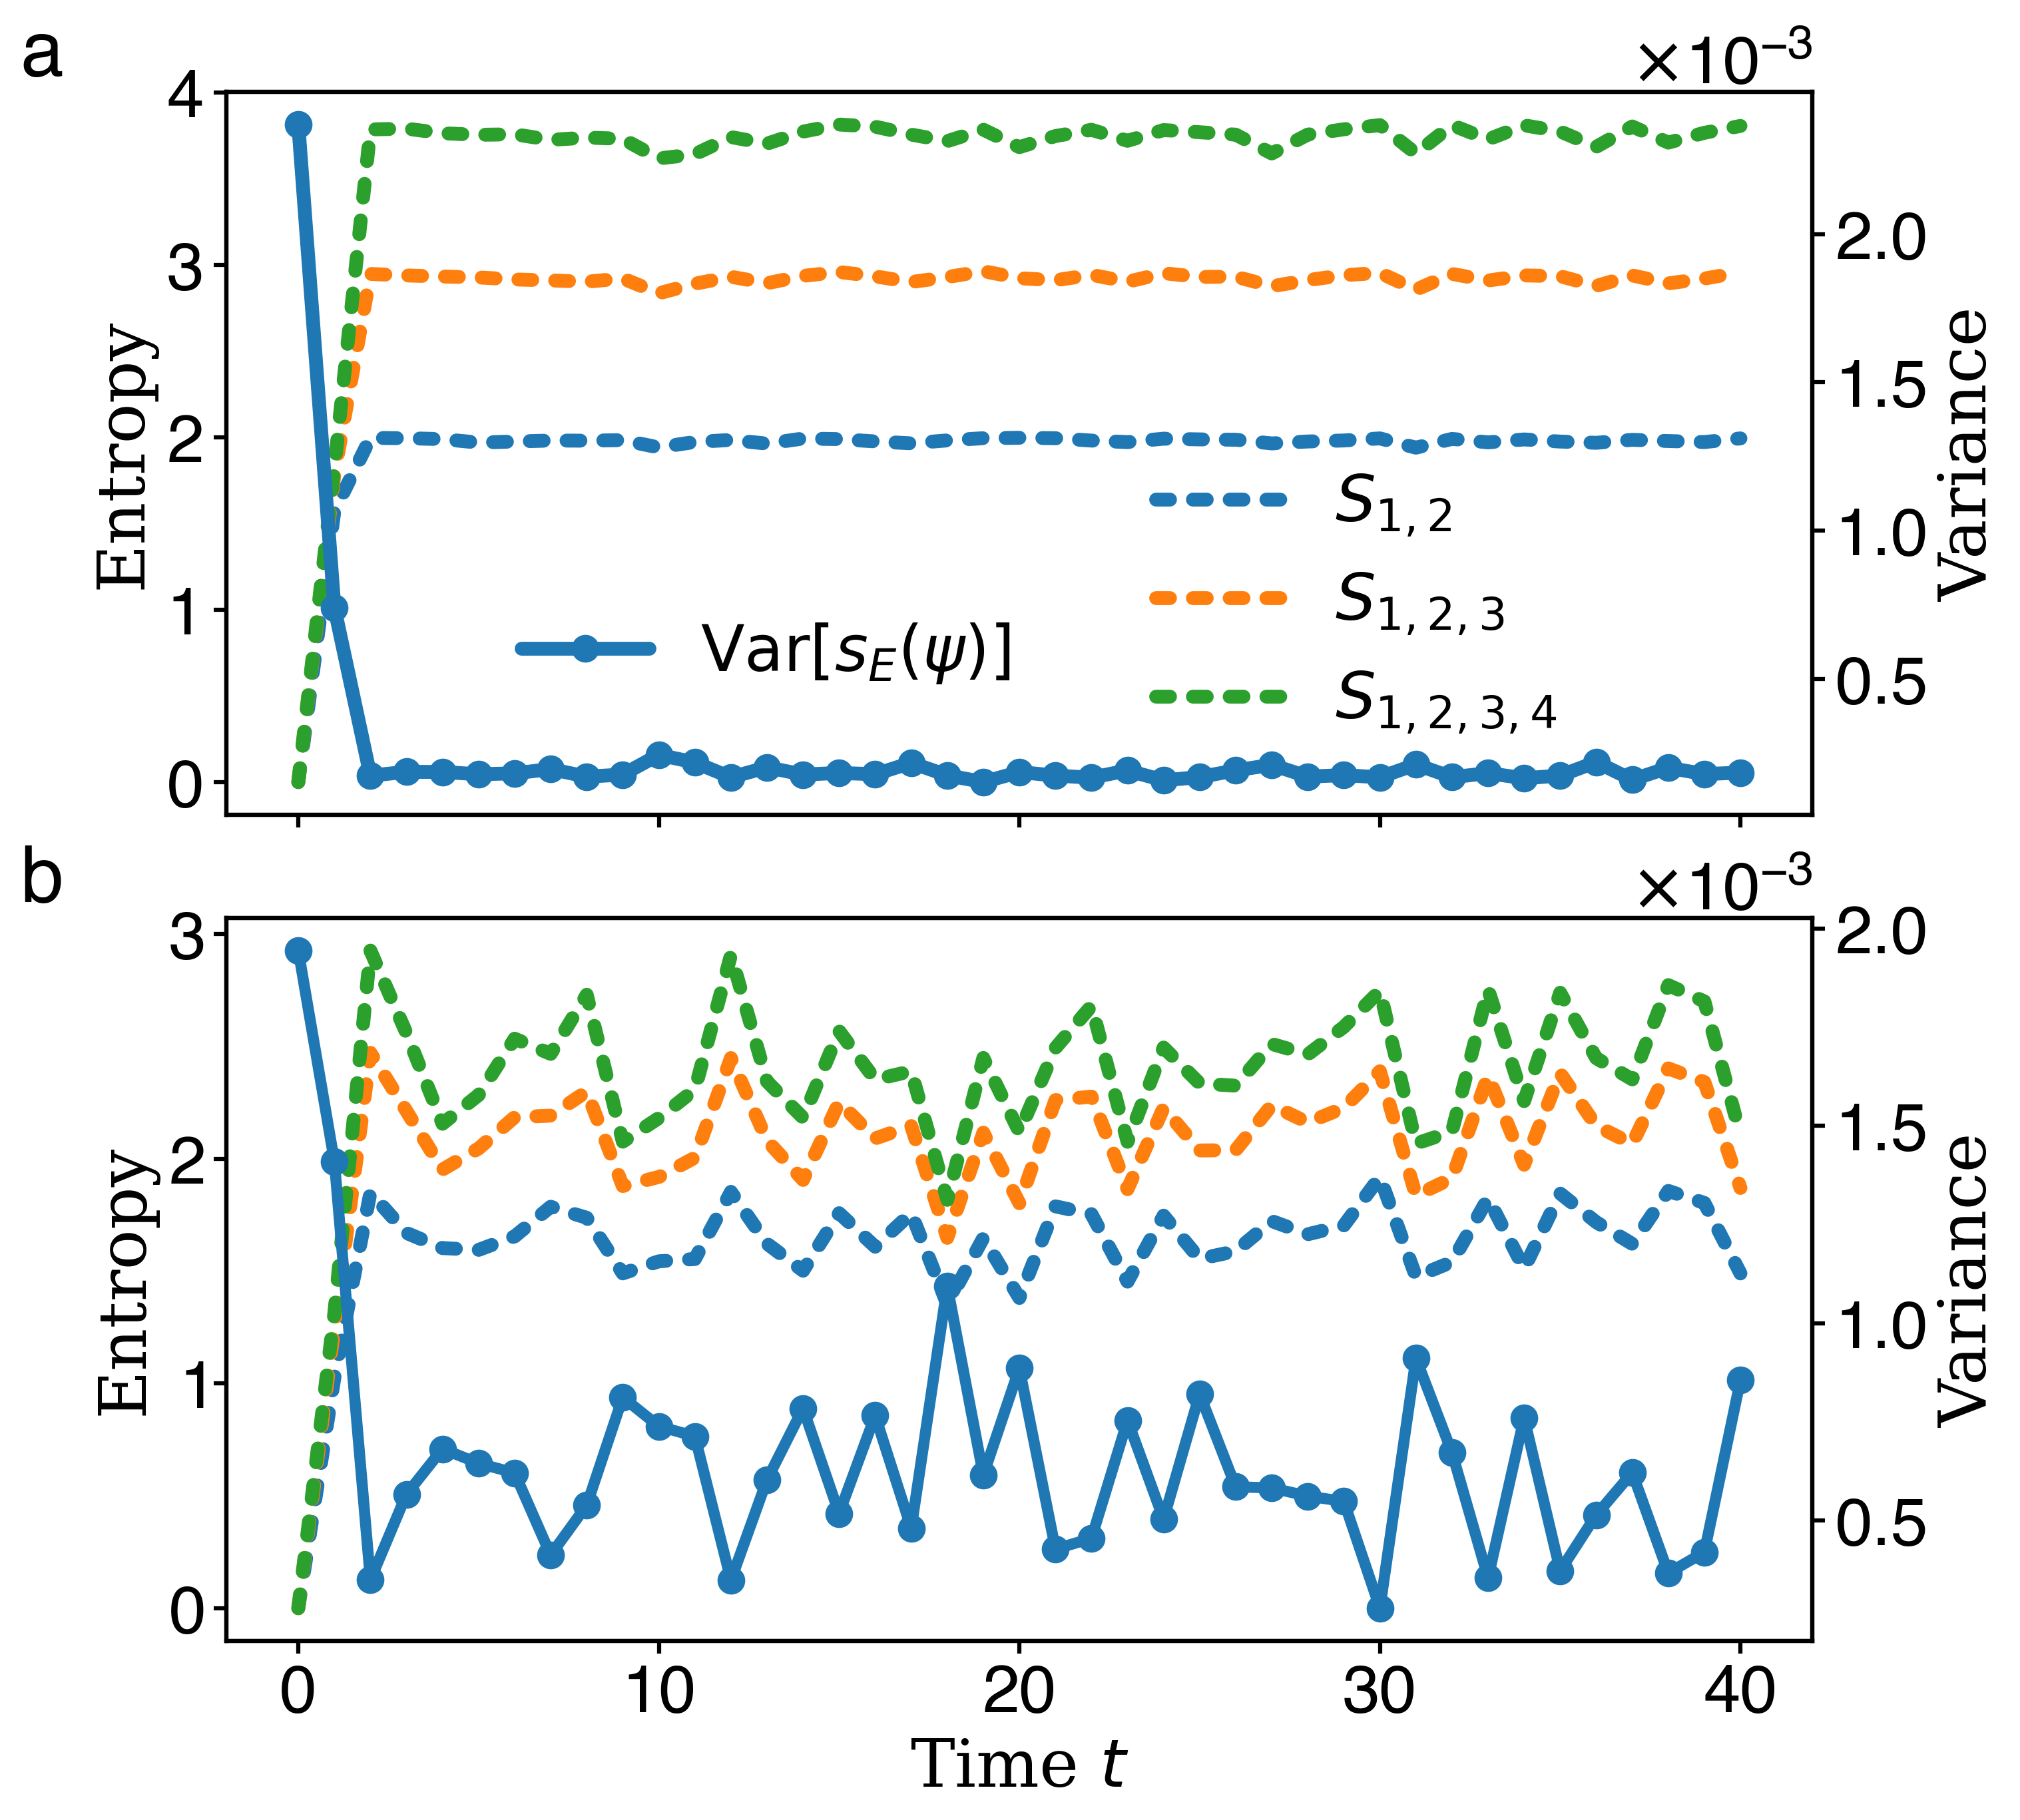

In [37]:
# Create figure with two subplots side by side
fig, (ax1_right, ax1_left) = plt.subplots(2, 1, figsize=(10, 9), layout='constrained',sharex=True)
x=np.linspace(0,40,41)
ls=24
fontprops = {'family': 'serif', 'weight': 'normal', 'size': 24}
# ========== LEFT PLOT: ATYPICAL ==========
ax1_left.set_ylabel(r"Entropy", fontdict=fontprops)
ax1_left.set_xlabel(r"Time $t$", fontdict=fontprops)
ax1_left.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2),useMathText=True)
part = [2, 3, 4]
labels = [rf'$S_{{1,2}}$', rf'$S_{{1,2,3}}$', rf'$S_{{1,2,3,4}}$']
for j, m in enumerate(part):
    y = np.load(f"./vardata/part{m}atypical.npy")
    ax1_left.plot(x, y, label=labels[j], 
                  linestyle="dotted", linewidth=5)
ax1_left.tick_params(axis='y', which='major', labelsize=ls)

ax2_left = ax1_left.twinx()
ax2_left.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2),useMathText=True)
ax2_left.set_ylabel(r"Variance", fontdict=fontprops)

ax2_left.tick_params(axis='y', labelsize=ls, which='both')
ax2_left.tick_params(axis='x', labelsize=ls)
offset_text_left = ax2_left.yaxis.get_offset_text()
offset_text_left.set_fontsize(ls)
# ax1_left.set_title(r"(a) Atypical", fontdict=fontprops, pad=20)
ax2_left.plot(x, moments_anti, label=rf'$\text{{Var}}[s_E(\psi)]$',marker="o", 
              markersize=7, linestyle="-", markeredgewidth=3, linewidth=4)
#ax2_left.errorbar(x,moments_anti,yerr=np.array(AntiwithCI), fmt='o',linestyle='-',ecolor="#993A9C", elinewidth=2, capsize=3,linewidth=2,color=colors[0],markersize=4, markerfacecolor=colors[0],markeredgecolor=colors[0])




# ========== RIGHT PLOT: TYPICAL ==========
#ax1_right.set_xlabel(r"Time $t$", fontdict=fontprops)
# move the ylabel to the top of the axis
ax1_right.set_ylabel(r"Entropy", fontdict=fontprops)
# ax2_right.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[8], rotation=0, ha='left', va='bottom')
# ax2_right.yaxis.set_label_coords(0.75, 1.02) 
# ax2_left.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[8], rotation=0, ha='left', va='bottom')
# ax2_left.yaxis.set_label_coords(0.75, 1.02) 
for j, m in enumerate(part):
    y = np.load(f"./vardata/part{m}typical.npy")
    ax1_right.plot(x, y, label=labels[j], 
                   linestyle="dotted", linewidth=5)
ax1_right.tick_params(axis='y', which='major', labelsize=ls)

ax2_right = ax1_right.twinx()
ax2_right.set_ylabel(r"Variance", fontdict=fontprops)
ax2_right.plot(x, moments_ent,label=rf'$\text{{Var}}[s_E(\psi)]$',marker="o", markersize=7, linestyle="-", markeredgewidth=3, linewidth=5)
# ax2_right.errorbar(x,moments_ent,yerr=np.array(EntwithCI), fmt='o',linestyle='-',ecolor="#993A9C", elinewidth=2, 
#                   capsize=3,linewidth=2,color=colors[0],markersize=3.5, markerfacecolor=colors[0],markeredgecolor=colors[0],label=r"Variance")
ax2_right.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2),useMathText=True)
ax2_right.tick_params(axis='y', labelsize=ls, which='both')
ax2_right.tick_params(axis='x', labelsize=ls)
offset_text_right = ax2_right.yaxis.get_offset_text()
offset_text_right.set_fontsize(ls)
# ax1_right.set_title(r"(b) Typical", fontdict=fontprops, pad=20)


# Optional: Add a shared legend
# lines1, labels1 = ax1_left.get_legend_handles_labels()
# lines2, labels2 = ax2_left.get_legend_handles_labels()
# fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', 
#            bbox_to_anchor=(0.3, 0.56), fontsize=22)
ax2_right.legend(loc='lower left', bbox_to_anchor=(0.15, 0.10), fontsize=23, framealpha=0)
ax1_right.legend(loc='lower left', bbox_to_anchor=(0.55, 0.03), fontsize=23, framealpha=0)
# fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', 
#            bbox_to_anchor=(0.5, 1.02), ncol=4, fontsize=24)

for ax, label in zip([ax1_right, ax1_left], ['a', 'b']): 
    ax.text(-0.13,1.1, label, transform=ax.transAxes, fontsize=28, va='top', weight='bold')